# ENTREGA DEL MINIPROYECTO #1

**Desarrollado por**:

Johan D√≠az

Miguel Lugo

Luis David Pe√±aranda

Hector Sanjuan


## √çndice

    1. An√°lisis Exploratorio de Datos (EDA)

        1.1. Carga de los datos 

        1.2 Primer vistazo a los datos

        1.3. An√°lisis de los datos

        1.4. Resumen de las variables n√∫mericas

        1.5 Distribuci√≥n de la variable objetivo

        1.6 An√°lisis de las categ√≥ricas vs el target

        1.7 Visualizaci√≥n de las variables num√©ricas

            1.7.1 Histogramas
        
            1.7.2 Boxplot y detecci√≥n de outliers

        1.8 Matriz de correlaci√≥n

    2. Modelos K-nn

        2.1 Modelo de clasificaci√≥n binaria
            
            2.1.1 B√∫squeda del mejor K

            2.1.2 Entrenamiento del modelo con el mejor K, matriz de confusi√≥n y m√©tricas precision, recall y f1-score

            2.1.3 Curva ROC y AUC

        2.2 Modelo de regresi√≥n
        

## 1. An√°lisis Exploratorio de Datos (EDA)

### 1.1 Carga de los datos

Primero que todo, cargamos la base de datos almacenada en un archivo `.csv` para poder trabajar con ella.

In [32]:
# Importaci√≥n de librer√≠as necesarias
import pandas as pd
import numpy as np
import warnings
import IPython.display as display
from scipy.stats.mstats import winsorize
import math
warnings.filterwarnings("ignore")

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n de estilo
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (10, 6)})

url="https://raw.githubusercontent.com/hector3910/minproyect_1/refs/heads/main/data/data.csv"
# Cargar el archivo CSV
df = pd.read_csv(url, sep=";")  


### 1.2 Primer vistazo a los datos

Para poder realizar un buen modelo tenemos que ver antes el comportamiento de los datos y realizar cambios a los mismos de ser necesarios.

In [33]:
# Mostrar forma del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Mostrar primeras filas
df.head()


El dataset tiene 4424 filas y 37 columnas.


Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

### 1.3. An√°lisis de los datos

Revisamos las caracter√≠sticas de la base de datos, y si hay datos faltantes en la base aplicamos una imputaci√≥n.

In [34]:
print("Resumen t√©cnico del DataFrame:")
df.info()

Resumen t√©cnico del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's 

La funci√≥n `.info()` nos revela lo siguiente:
- **El tama√±o de la base de datos:** Este conjunto de datos tiene 4424 entradas, as√≠ como 37 columnas, incluyendo el target.

- **Los tipos de datos encontrados**: Si bien a simple vista podemos apreciar que algunos nombres de las variables nos indican que estas deber√≠an ser categ√≥ricas, en esta base de datos se encuentran registradas por una codificaci√≥n num√©rica, por lo que aparecen como tipo `int64`. Otros tipos encontrados son el `float64` para variables como `Curricular units 1st sem (grade)`, el cual se refiere a la nota conseguida por los alumnos. Por √∫ltimo, est√° el tipo `object` para la variable target, la cual si est√° registrada por sus categor√≠as y no por una codificaci√≥n.

- **El n√∫mero de valores no nulos por variable**: Dado que, en cada variable, el n√∫mero de valores no nulos es el mismo que el de instancias de la base de datos, concluimos que no existen datos faltantes, por lo que podemos seguir con el an√°lisis sin necesidad de una imputaci√≥n.

Dado que las variables categ√≥ricas est√°n codificadas num√©ricamente, vamos a diferenciarlas de las n√∫mericas:

In [35]:

#Limpiamos los nombres de las columnas
df.columns = df.columns.str.strip()

#Variables categ√≥ricas codificadas num√©ricamente
categorical_columns = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
    "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced',
    'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International'
]

#Seleccionar variables num√©ricas reales
numerical_columns = [col for col in df.columns 
                     if df[col].dtype in ['int64', 'float64'] 
                     and col not in categorical_columns 
                     and col != 'Target']


### 1.4 Resumen de las variables num√©ricas

Realizamos un resumen num√©rico de la base de datos con la funci√≥n `describe()`.

In [36]:
# Medidas estad√≠sticas para variables num√©ricas reales
medidas = df[numerical_columns].describe().T

display.display(medidas)


count        mean        std  \
Previous qualification (grade)                  4424.0  132.613314  13.188332   
Admission grade                                 4424.0  126.978119  14.482001   
Age at enrollment                               4424.0   23.265145   7.587816   
Curricular units 1st sem (credited)             4424.0    0.709991   2.360507   
Curricular units 1st sem (enrolled)             4424.0    6.270570   2.480178   
Curricular units 1st sem (evaluations)          4424.0    8.299051   4.179106   
Curricular units 1st sem (approved)             4424.0    4.706600   3.094238   
Curricular units 1st sem (grade)                4424.0   10.640822   4.843663   
Curricular units 1st sem (without evaluations)  4424.0    0.137658   0.690880   
Curricular units 2nd sem (credited)             4424.0    0.541817   1.918546   
Curricular units 2nd sem (enrolled)             4424.0    6.232143   2.195951   
Curricular units 2nd sem (evaluations)          4424.0    8.063291   3.947951   
Curricular units 2nd sem (approved)             4424.0    4.435805   3.014764   
Curricular units 2nd sem (grade)                4424.0   10.230206   5.210808   
Curricular units 2nd sem (without evaluations)  4424.0    0.150316   0.753774   
Unemployment rate                               4424.0   11.566139   2.663850   
Inflation rate                                  4424.0    1.228029   1.382711   
GDP                                             4424.0    0.001969   2.269935   

                                                  min     25%         50%  \
Previous qualification (grade)                  95.00  125.00  133.100000   
Admission grade                                 95.00  117.90  126.100000   
Age at enrollment                               17.00   19.00   20.000000   
Curricular units 1st sem (credited)              0.00    0.00    0.000000   
Curricular units 1st sem (enrolled)              0.00    5.00    6.000000   
Curricular units 1st sem (evaluations)           0.00    6.00    8.000000   
Curricular units 1st sem (approved)              0.00    3.00    5.000000   
Curricular units 1st sem (grade)                 0.00   11.00   12.285714   
Curricular units 1st sem (without evaluations)   0.00    0.00    0.000000   
Curricular units 2nd sem (credited)              0.00    0.00    0.000000   
Curricular units 2nd sem (enrolled)              0.00    5.00    6.000000   
Curricular units 2nd sem (evaluations)           0.00    6.00    8.000000   
Curricular units 2nd sem (approved)              0.00    2.00    5.000000   
Curricular units 2nd sem (grade)                 0.00   10.75   12.200000   
Curricular units 2nd sem (without evaluations)   0.00    0.00    0.000000   
Unemployment rate                                7.60    9.40   11.100000   
Inflation rate                                  -0.80    0.30    1.400000   
GDP                                             -4.06   -1.70    0.320000   

                                                       75%         max  
Previous qualification (grade)                  140.000000  190.000000  
Admission grade                                 134.800000  190.000000  
Age at enrollment                                25.000000   70.000000  
Curricular units 1st sem (credited)               0.000000   20.000000  
Curricular units 1st sem (enrolled)               7.000000   26.000000  
Curricular units 1st sem (evaluations)           10.000000   45.000000  
Curricular units 1st sem (approved)               6.000000   26.000000  
Curricular units 1st sem (grade)                 13.400000   18.875000  
Curricular units 1st sem (without evaluations)    0.000000   12.000000  
Curricular units 2nd sem (credited)               0.000000   19.000000  
Curricular units 2nd sem (enrolled)               7.000000   23.000000  
Curricular units 2nd sem (evaluations)           10.000000   33.000000  
Curricular units 2nd sem (approved)               6.000000   20.000000  
Curricular units 2nd se

A simple vista, y como posteriormente veremos en los boxplot, podemos ver algunas cosas interesantes.

- En las variables que hacen referencia a las asignaturas homologadas por el estudiante, es decir: `Curricular units 1st sem (credited)` y `Curricular units 2nd sem (credited)`, el 75% de los datos est√° registrado como 0, pero el registro mas alto es 20 y 19 respectivamente. Esto tiene sentido, ya que no todos los estudiantes tienen la oportunidad de homologar materias, por lo que la gran mayor√≠a tiene un valor de 0 en ese registro. Esto ademas nos da un indicio de que existen valores at√≠picos en estas variables.

- El comportamiento reci√©n mencionado se puede apreciar tambi√©n en las variables que hacen referencia a las asignaturas en las que los estudiantes no fueron evaluados (`Curricular units 1st sem (without evaluations)` y `Curricular units 2nd sem (without evaluations)`). Esto nos indica que no es tan grande la cantidad de alumnos que no presentaron ex√°menes (por abandonar la materia o por no cumplir los requisitos de la evaluaci√≥n).

- El valor m√≠nimo de las variables que reflejan la nota de los estudiantes (`Curricular units 1st sem (grade)` y `Curricular units 2nd sem (grade)`) es de 0, la cual puede ser una de las mas importantes razones por la cual un estudiante decida abandonar la universidad.

### 1.5 Distribuci√≥n de la variable objetivo

Luego del resumen num√©rico, veamos entonces como se encuentra distribuida la variable objetivo. 


Distribuci√≥n de la variable objetivo:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


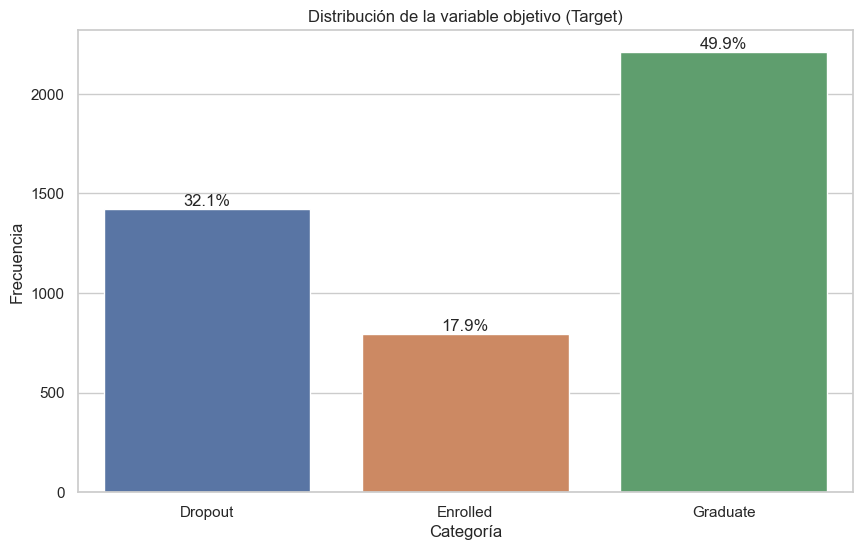

In [37]:
# Convertir la variable Target a tipo categ√≥rico
df["Target"] = df["Target"].astype("category")

# Ver distribuci√≥n de clases
print("\nDistribuci√≥n de la variable objetivo:")
print(df["Target"].value_counts())

# Visualizar la distribuci√≥n
ax=sns.countplot(x="Target", data=df)
plt.title("Distribuci√≥n de la variable objetivo (Target)")
plt.xlabel("Categor√≠a")
plt.ylabel("Frecuencia")

total = len(df['Target'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()


Podemos apreciar que la variable objetivo tiene 3 clases:

- `Dropout`: Estudiante que abandon√≥ la universidad

- `Enrolled`: Estudiante que sigue en la universidad

- `Graduate`: Estudiante graduado de la universidad

Adem√°s, se ve un claro desbalance de los datos en esta variable.


Dado que nuestro objetivo final es predecir qu√© estudiantes van a abandonar la universidad, podemos resumir el problema en uno de clasificaci√≥n binaria, tomando los registros de las clases `Enrolled` y `Graduate` como uno solo llamado `Not Dropout`:

In [38]:
df['Target'] = df['Target'].map({
    'Dropout': "Dropout",
    'Enrolled': "Not Dropout",
    'Graduate': "Not Dropout"
})

# Verificamos la codificaci√≥n
print(df['Target'].value_counts())

Target
Not Dropout    3003
Dropout        1421
Name: count, dtype: int64


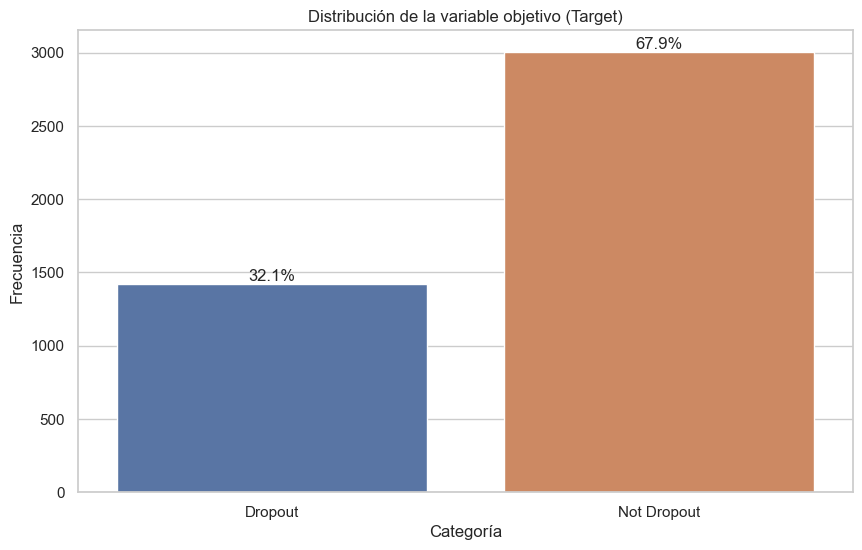

In [39]:



# Volvemos a visualizar la distribuci√≥n
ax=sns.countplot(x="Target", data=df)
plt.title("Distribuci√≥n de la variable objetivo (Target)")
plt.xlabel("Categor√≠a")
plt.ylabel("Frecuencia")

total = len(df['Target'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()


Ahora, sabiendo que el `67.9%` de los registros corresponden a los estudiantes que no abandonaron, y que el `32.1%` a los que s√≠, nos damos cuenta una vez m√°s del desbalance con el que cuentan los datos.

### 1.6 An√°lisis de las categ√≥ricas vs el target

Veamos como se comportan las variables categ√≥ricas dependiendo de si el estudiante abandon√≥ o no.

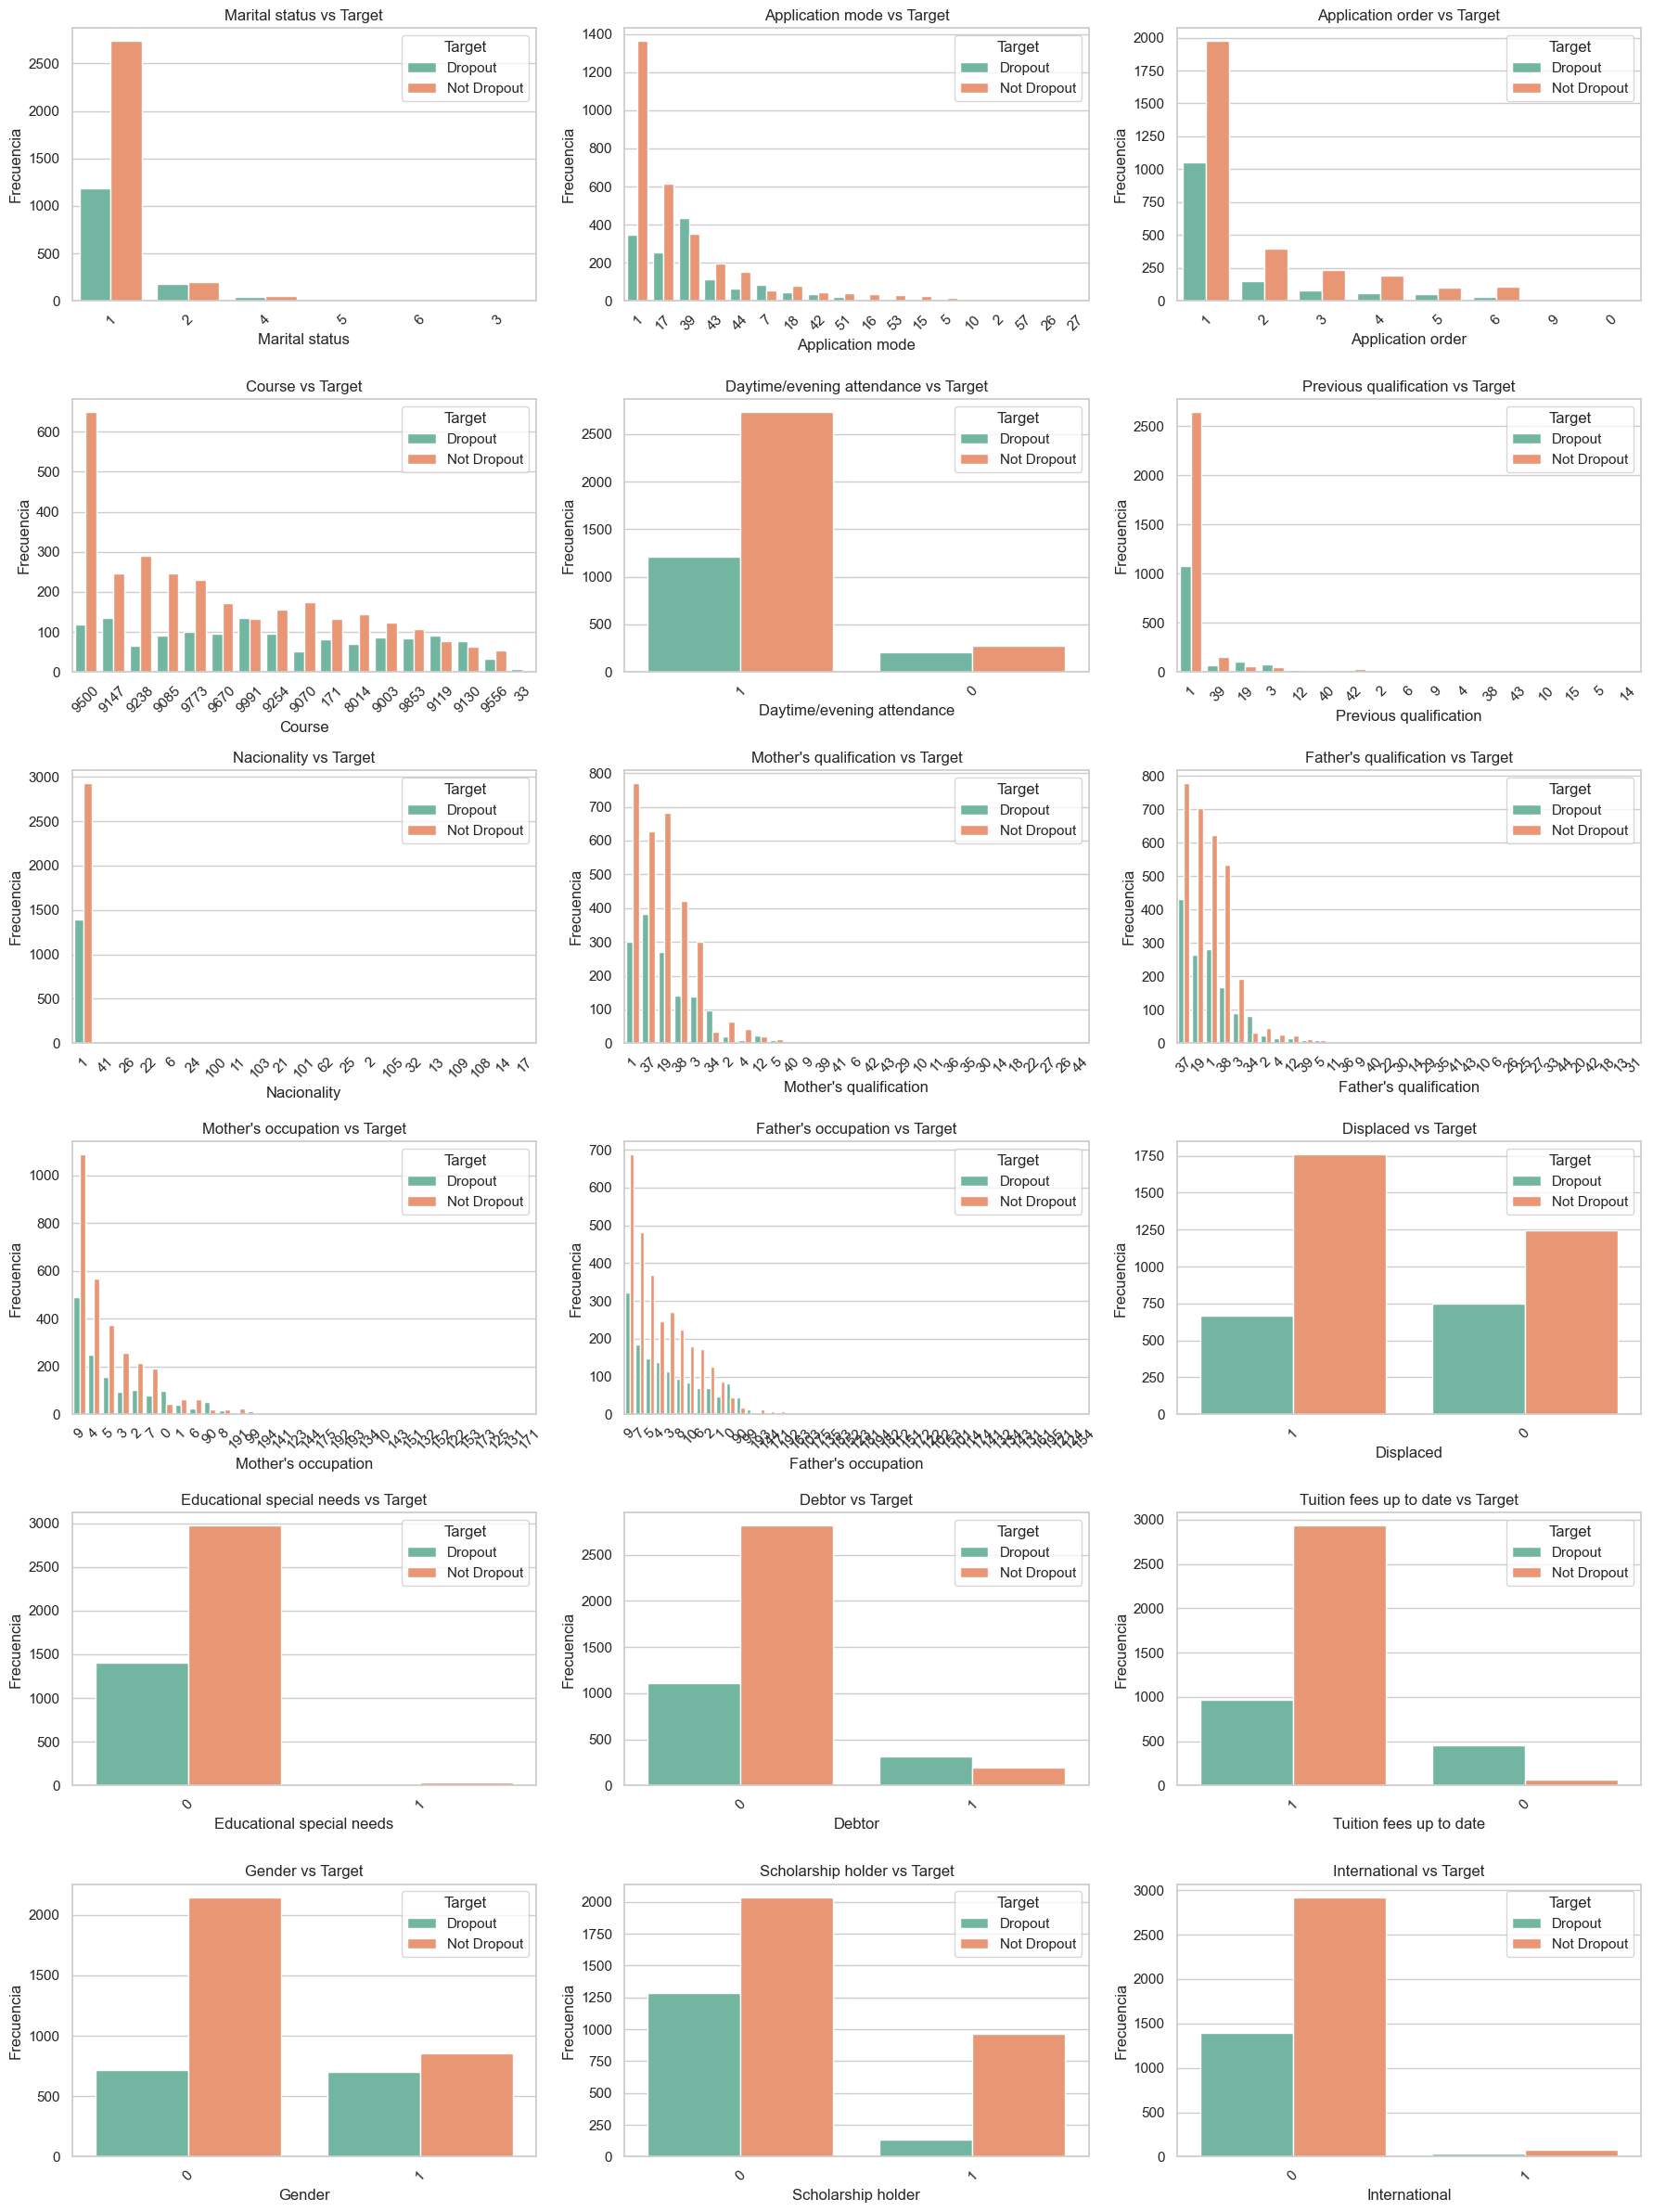

In [40]:
# Mostrar todos los gr√°ficos de barras en una sola imagen (subplots)


n = len(categorical_columns)
cols = 3  # N√∫mero de columnas de subplots (ajusta seg√∫n prefieras)
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='Target', order=df[col].value_counts().index, palette="Set2", ax=axes[i])
    axes[i].set_title(f'{col} vs Target')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Target')

# Eliminar subplots vac√≠os si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

De estos gr√°ficos podemos concluir varias cosas:

- En la variable `Marital Status`, las categor√≠as mas influyentes son: soltero`(1)` y casado`(2)`. A√∫n teniendo en cuenta que hay un desbalance en la clases del target, la proporci√≥n de abandono de los estudiantes casados es bastante alta. 

- De la variable `Course` observamos que, a excepci√≥n de unos cuantos cursos, la proporci√≥n de abandono es relativamente baja.

- De la variable `Gender`, la proporci√≥n de hombres `(1)` que abandonan los estudios es muy alta, mientras que la de mujeres `(0)` no tanto.

### 1.7 Visualizaci√≥n de las variables num√©ricas

#### 1.7.1 Histogramas

Primero, veamos c√≥mo se distribuyen las variables num√©ricas por medio de histogramas.

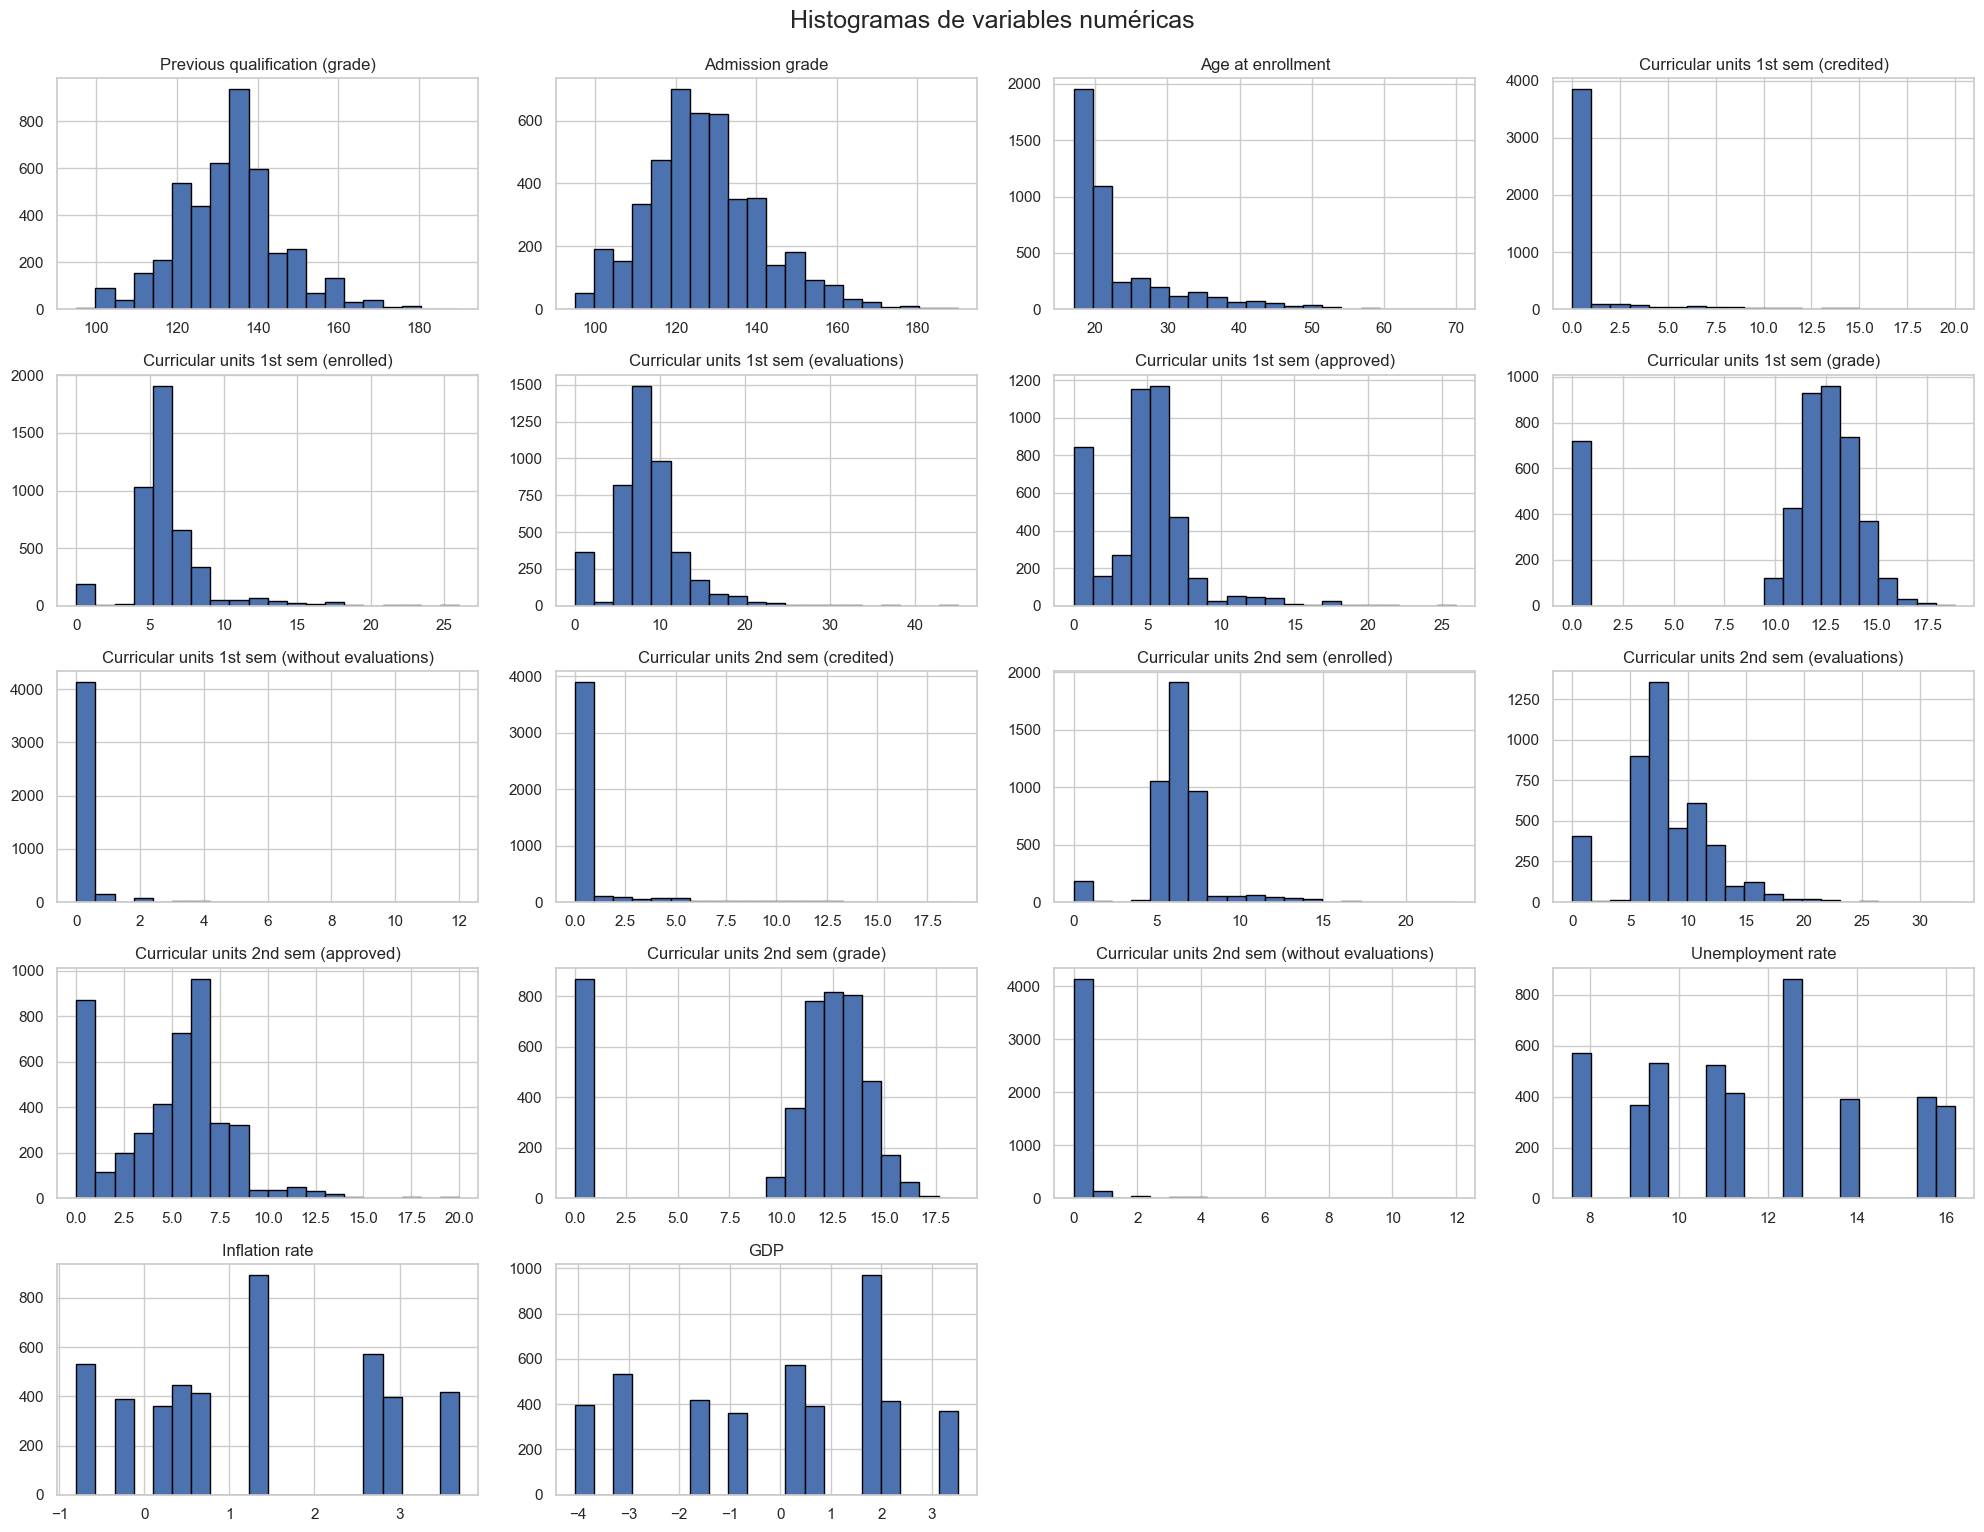

In [41]:
# Visualizaci√≥n de histogramas
df[numerical_columns].hist(figsize=(20, 15), bins=20, edgecolor='black')
plt.tight_layout()
plt.suptitle("Histogramas de variables num√©ricas", fontsize=18, y=1.02)
plt.show()


De estos histogramas notamos varias cosas:

- Solo la variable `Previous qualification (grade)` parece tener distribuci√≥n normal.

- Como se anticip√≥ en el resumen num√©rico, la gran mayor√≠a de los registros de las variables :`Curricular units 1st sem (credited)`, `Curricular units 2nd sem (credited)`, `Curricular units 1st sem (without evaluation)` y `Curricular units 2nd sem (without evaluation)`, giran en torno a 0, debido a que no es tan com√∫n que muchos estudiantes homologuen asignaturas o no se presenten a las evaluaciones correspondientes.

- Variables como `Admission grade` , `Age at enrollment`, `Curricular units 1st sem (credited)`, `Curricular units 1st sem (enrolled)`,`Curricular units 1st sem (evaluations)`,`Curricular units 1st sem (without evaluations)`,`Curricular units 2nd sem (credited)`,`Curricular units 2nd sem (enrolled)`,`Curricular units 2nd sem (evaluations)` y `Curricular units 2nd sem (without evaluations)` tienen un sesgo a la derecha.

#### 1.7.2 Boxplot y detecci√≥n de outliers

En esta secci√≥n veremos otra forma de ver la distribuci√≥n de los datos y la cantidad de outliers que tienen.

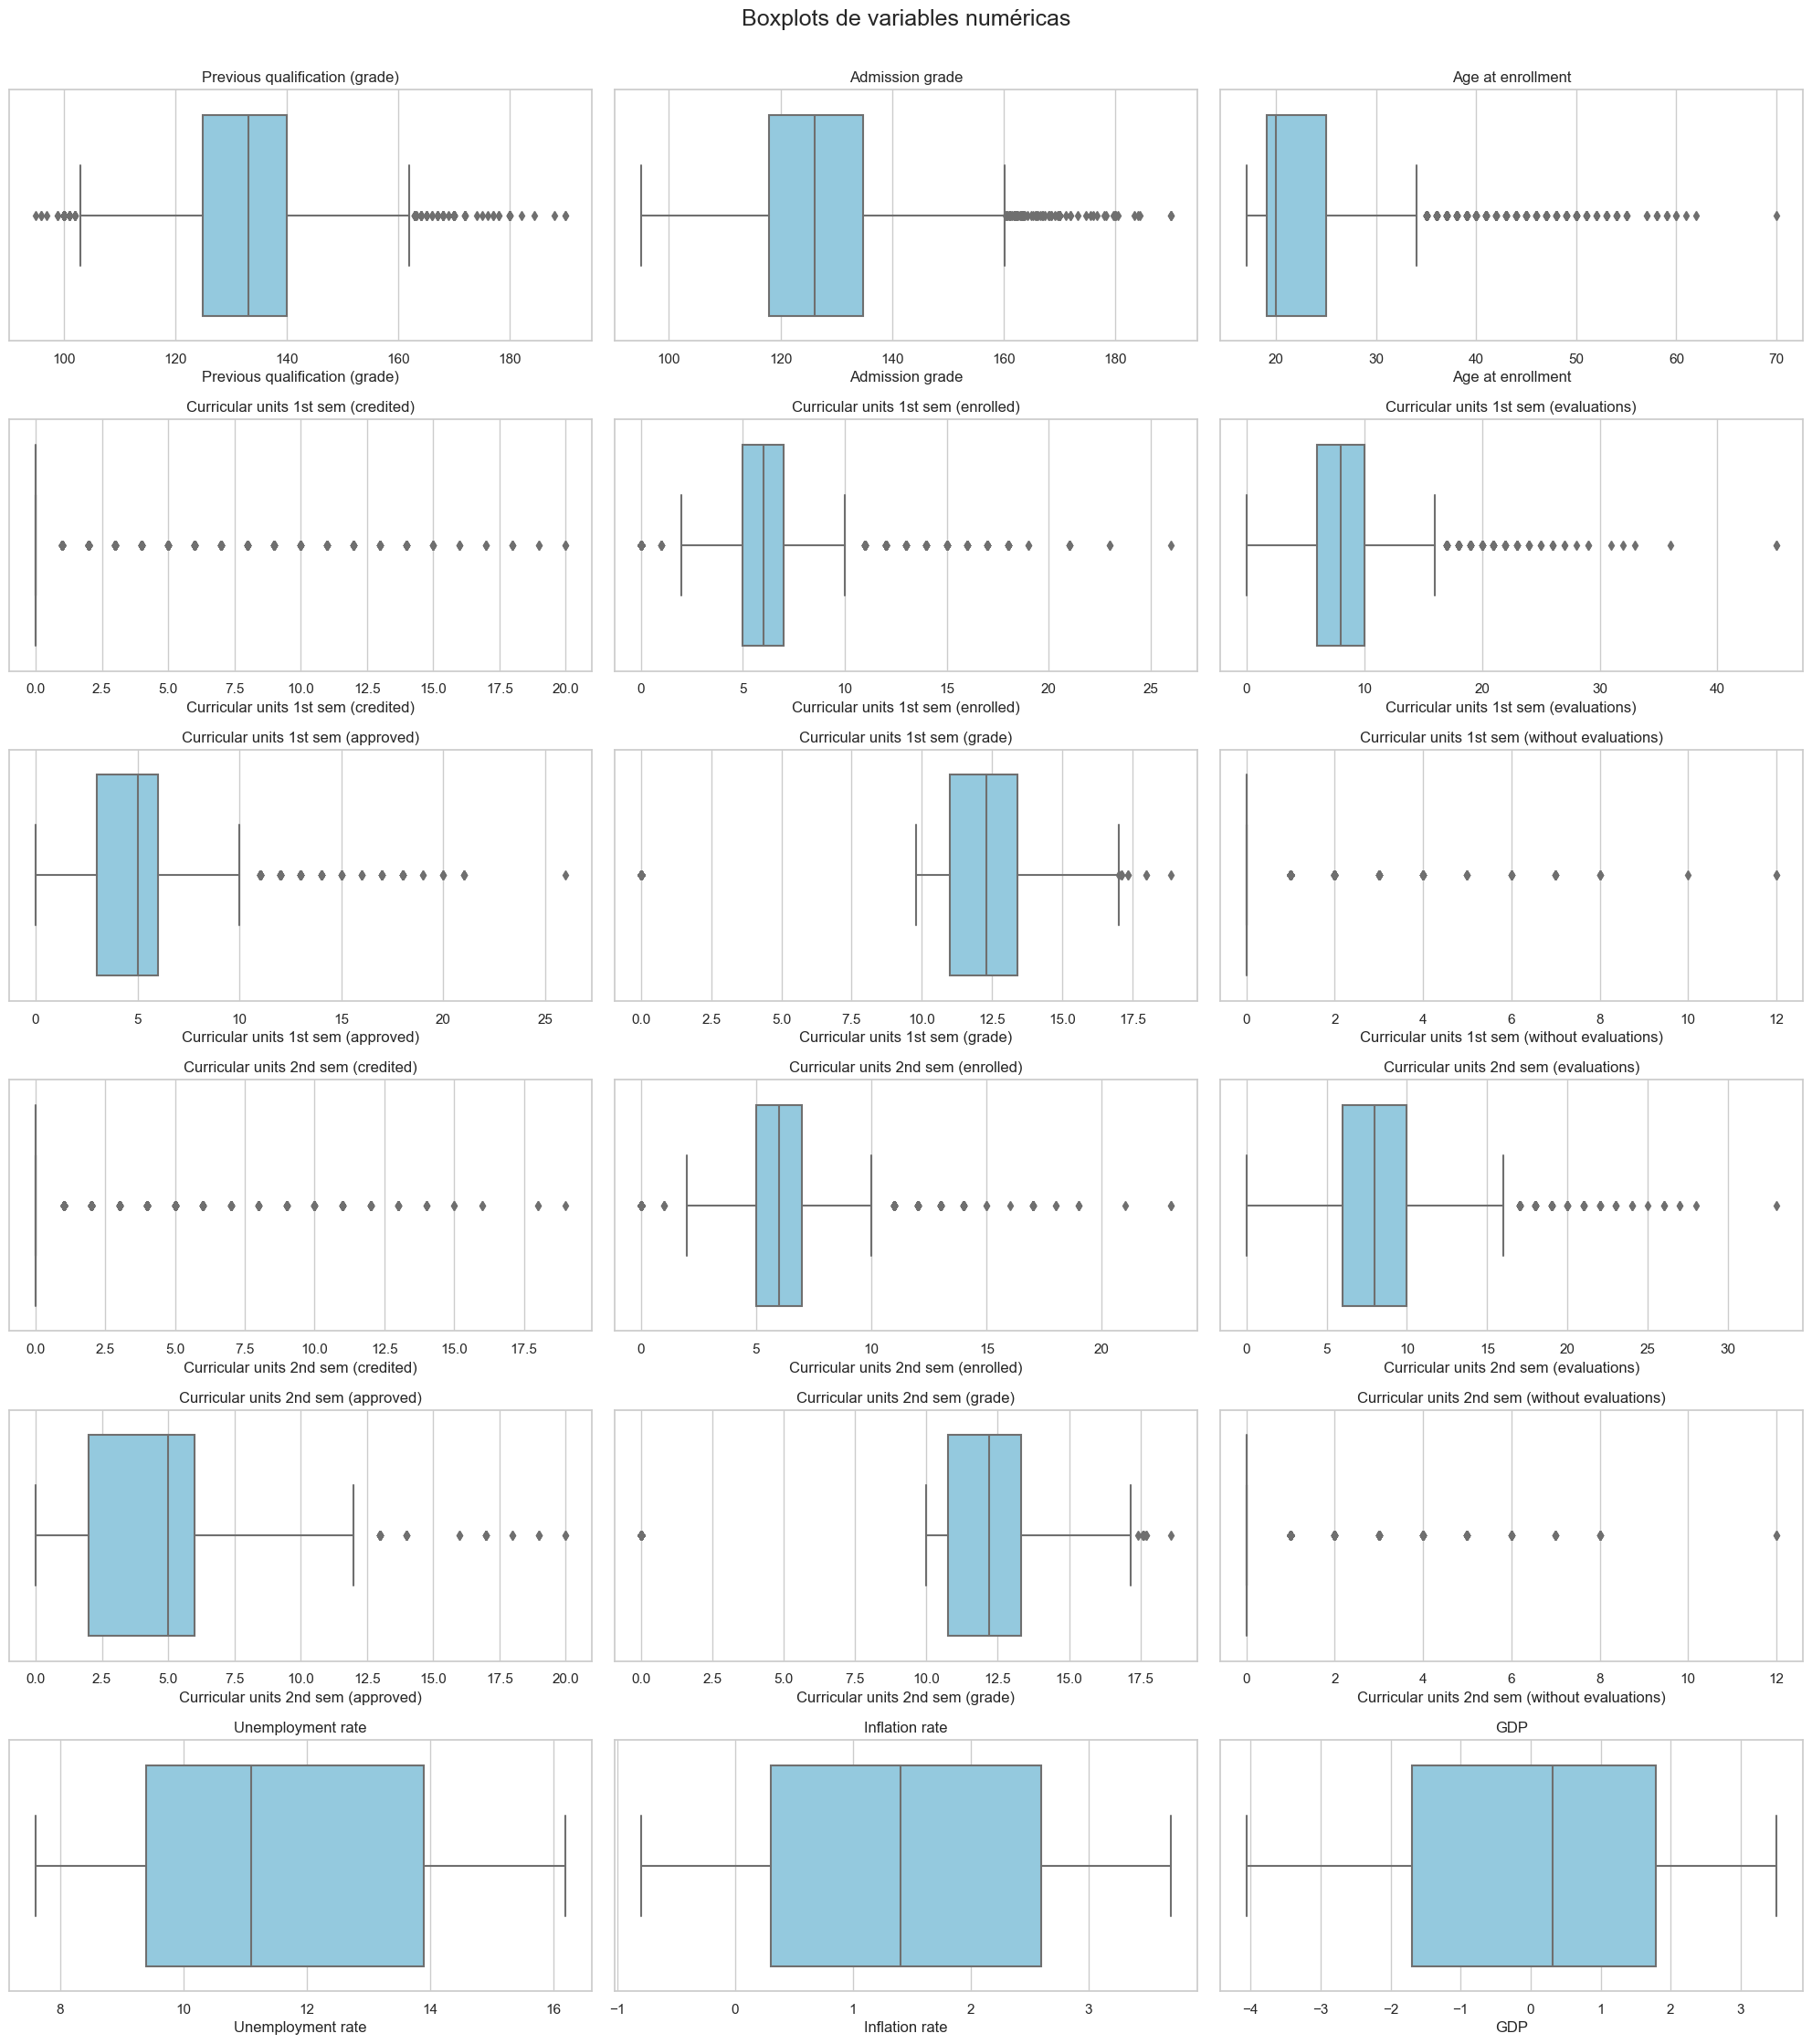

In [42]:
# Visualizaci√≥n: boxplots
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplots de variables num√©ricas", fontsize=18, y=1.02)
plt.show()


De estas gr√°ficas podemos notar que:

- Las variables `Unemployment rate`, `Inflation rate` y `GDP` son las √∫nicas que no tienen outliers.

- Variables que representan notas como lo son: `Curricular units 1st sem (grade)`y `Curricular units 2nd sem (grade)` tienen valores at√≠picos no tan dispersos, esto se debe a que de por s√≠ la caja es bastante compacta y son muy pocas las notas casi perfectas o notas que demuestran la inasistencia al curso como lo es el 0.

- Variables como `Curricular units 1st sem (credited)`, `Curricular units 2nd sem (credited)`, `Curricular units 1st sem (without evaluations)`y `Curricular units 2nd sem (without evaluations)` tienen valores at√≠picos muy dispersos, lo cual encaja con la descripci√≥n vista en la secci√≥n anterior.

Ahora veamos una comparaci√≥n con boxplots entre el grupo que abandon√≥ y el que no lo hizo.

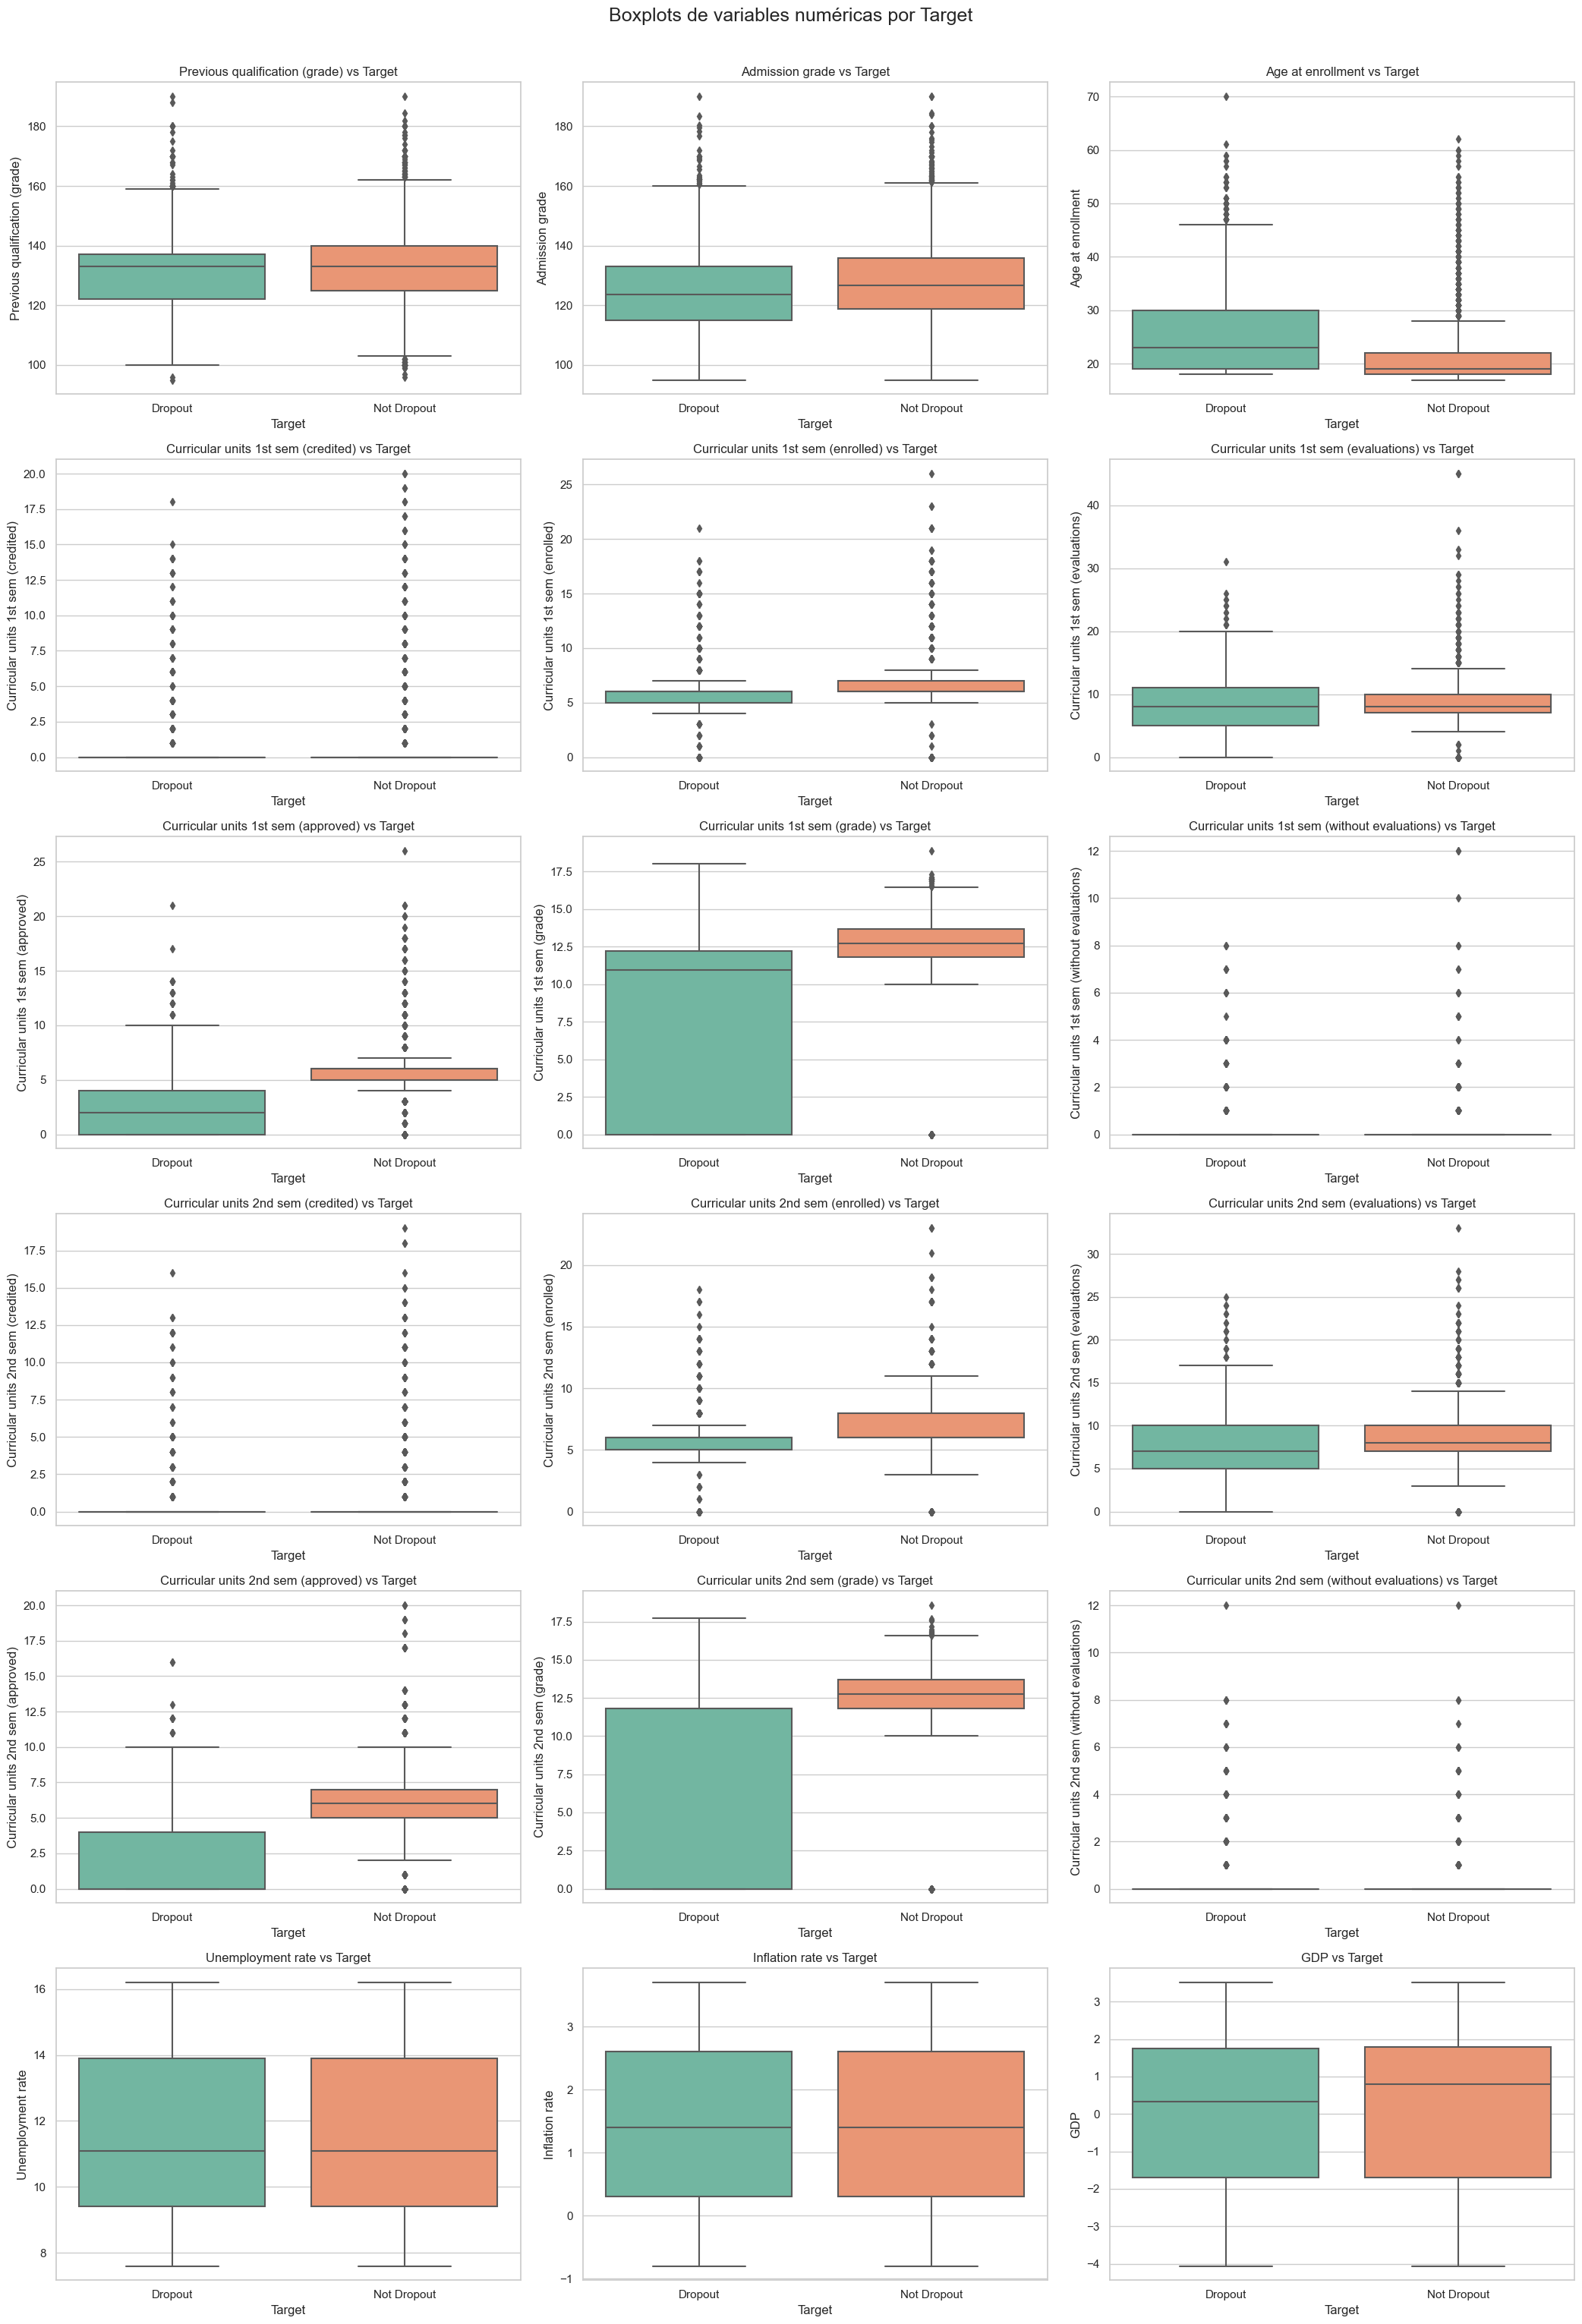

In [43]:

n = len(numerical_columns)
cols = 3  
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*7, rows*5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Target', y=col, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{col} vs Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(col)

# Eliminar subplots vac√≠os si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots de variables num√©ricas por Target", fontsize=18, y=1.02)
plt.show()

Aqu√≠ podemos ver varias diferencias bastante marcadas:

- Como era de esperarse, y como se puede apreciar en los diagramas de las variables asociadas a las notas de cada semestre, `Curricular units 1st sem (grade)` y `Curricular units 2nd sem (grade)`, las personas con las nostas m√°s bajas son las que tienden a retirarse de la universidad.
- As√≠ mismo, las personas que ganan una mayor cantidad de materias en cada semestre, vea `Curricular units 1st sem (approved)`  y `Curricular units 2nd sem (approved)`, son las que tienden a quedarse estudiando.

- Los otros boxplots no muestran una relaci√≥n tan directa como los ya mencionados.

En general, pr√°cticamente todas las variables tienen valores at√≠picos, y esto no necesariamente debe significar que son registros err√≥neos, sino que al estar evaluando a tantas personas, siempre est√° la posibilidad de que algunos destaquen sobre el resto, ya sea en sus notas, favorable o desfavorablemente, en el n√∫mero de materias inscritas, en el n√∫mero de materias homologadas, etc. Por ello, vamos a ver la cantidad de outliers que hay por variable.

In [44]:
#Funci√≥n para detectar outliers usando IQR
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((serie < lower) | (serie > upper))

# Contar outliers por variable
print("Conteo de outliers por variable num√©rica:")
for col in numerical_columns:
    outliers = detectar_outliers_iqr(df[col])
    print(f"{col}: {outliers.sum()} outliers detectados")

Conteo de outliers por variable num√©rica:
Previous qualification (grade): 179 outliers detectados
Admission grade: 86 outliers detectados
Age at enrollment: 441 outliers detectados
Curricular units 1st sem (credited): 577 outliers detectados
Curricular units 1st sem (enrolled): 424 outliers detectados
Curricular units 1st sem (evaluations): 158 outliers detectados
Curricular units 1st sem (approved): 180 outliers detectados
Curricular units 1st sem (grade): 726 outliers detectados
Curricular units 1st sem (without evaluations): 294 outliers detectados
Curricular units 2nd sem (credited): 530 outliers detectados
Curricular units 2nd sem (enrolled): 369 outliers detectados
Curricular units 2nd sem (evaluations): 109 outliers detectados
Curricular units 2nd sem (approved): 44 outliers detectados
Curricular units 2nd sem (grade): 877 outliers detectados
Curricular units 2nd sem (without evaluations): 282 outliers detectados
Unemployment rate: 0 outliers detectados
Inflation rate: 0 outlie

Como vemos, hay bastantes outliers, esto m√°s que nada se debe a que, al ser registros de notas de diferentes alumnos, hay bastantes que se destacan por encima del resto, por lo que pueden ser marcados como outliers.

### 1.8 Matriz de correlaci√≥n

Veamos ahora la matriz de correlaci√≥n para las variables num√©ricas:

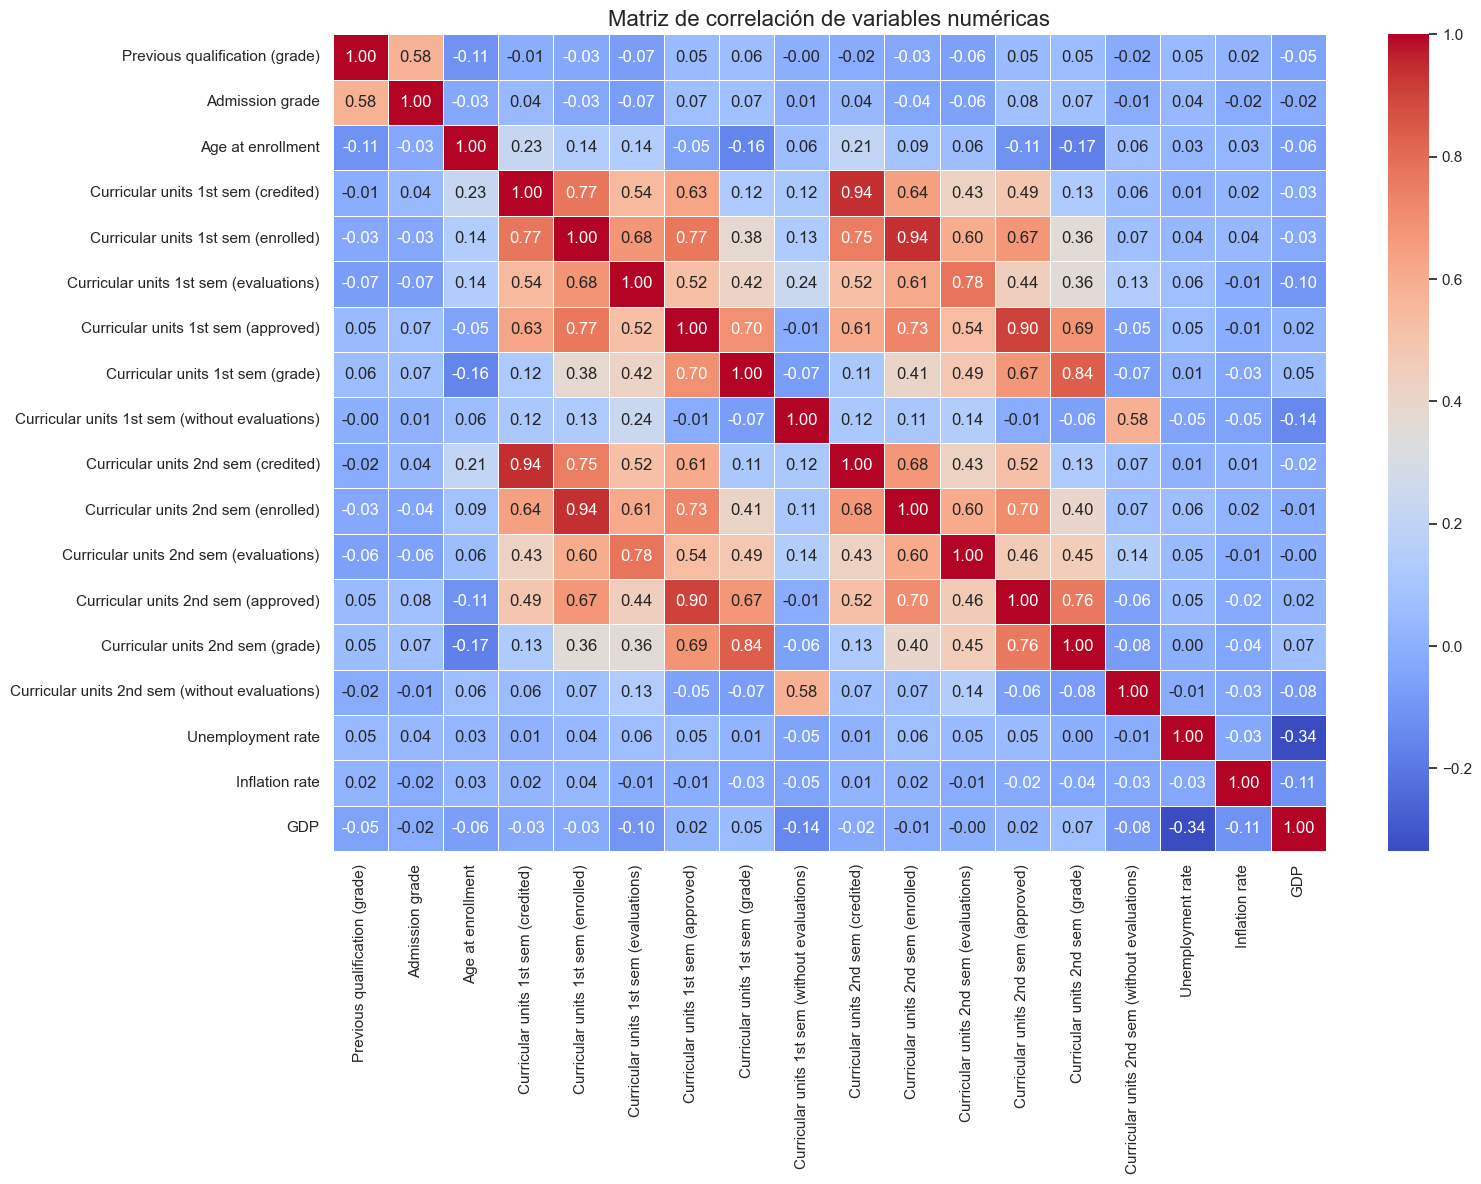

In [45]:
# Matriz de correlaci√≥n
plt.figure(figsize=(16, 12))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlaci√≥n de variables num√©ricas", fontsize=16)
plt.tight_layout()
plt.show()


Veamos cuales son las variables que mas se relacionan entre s√≠:

- `Previous qualification (grade)`y `Admission grade`: Por su misma definici√≥n, tiene sentido que est√©n algo relacionadas, ya que ambas notas son de antes de entrar a la universidad, as√≠ que sus notas puede que no var√≠en tanto de un momento a otro, lo cual es confimado por la matriz

- En general podemos ver una gran correlaci√≥n entre las materias aprobadas de cada semestre, las notas conseguidas de cada semestre y las materias matriculadas en cada semestre, lo cual indica un desempe√±o similar para los estudiantes en los dos semestres.

### 1.9 Conclusi√≥n del An√°lisis exploratorio de datos (EDA)

Gracias a este an√°lisis exploratorio, podemos darnos mejores ideas de como se comportan los datos:

- Nos brind√≥ el hecho de que **no hay datos faltantes**, lo cual evita que hagamos una imputaci√≥n innecesaria de datos.

- A su vez pudimos confirmar que variables como las notas conseguidas en los 2 semestres, `Curricular units 1st sem (grade)` y `Curricular units 2 sem (grade)`, tienen una alta relaci√≥n con el hecho de que un estudiante abandone o no la universidad.

- Los **outliers**, aunque son muchos, pueden ser tratados con el fin de mejorar el rendimiento del modelo.

Luego de realizar este an√°lisis exploratorio, podemos empezar a implementar tanto el modelo de clasificaci√≥n, como el modelo de regresi√≥n, para predecir si un estudiante abandonar√° la universidad o no, y su promedio, respectivamente.

## 2. Modelo K-nn

### 2.1 Modelo de clasificaci√≥n binaria

Primero, vamos a codificar num√©ricamente la variable objetivo, previamente modificada para atender a un problema de clasificaci√≥n binaria.

In [46]:
# Codificamos manualmente la variable objetivo 'Target' para clasificaci√≥n binaria
# 1 ‚Üí Estudiante que abandon√≥ (Dropout)
# 0 ‚Üí Estudiante que sigue activo (Enrolled) o se gradu√≥ (Graduate), ambas categor√≠as se consideran como "Not Dropout"
df['Target'] = df['Target'].map({
    'Dropout': 1,
    'Not Dropout': 0,
})

# Verificamos la codificaci√≥n
print(df['Target'].value_counts())


Target
0    3003
1    1421
Name: count, dtype: int64


Luego, separamos las caracter√≠sticas y la variable objetivo, con el fin de usarla posteriormente para entrenar al modelo.

In [47]:
#Separamos las caracter√≠sticas y la variable objetivo
# 'X' contiene todas las columnas excepto 'Target'
# 'y' contiene √∫nicamente la columna objetivo ya codificada (abandona = 1, no abandona = 0)
X = df.drop(columns=['Target'])
y = df['Target']

Verificamos que todo haya salido bien.

In [48]:
# Mostrar la lista completa de nombres de columnas en X
# Esto es √∫til para verificar qu√© variables est√°n disponibles despu√©s de eliminar 'Target'
print(X.columns.tolist())

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


Dado que todo fue separado correctamente, procedemos a importar las librerias necesarias para el modelo K-nn:

In [49]:

from sklearn.model_selection import StratifiedKFold  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

#### 2.1.1 B√∫squeda del mejor K

Primero que todo, queremos encontrar el n√∫mero de vecinos √≥ptimo para encontrar el modelo de mejor rendimiento, para esto, primero dividimos el conjunto de datos con la funci√≥n `train_test_split`, dejando un conjunto de test para la evaluaci√≥n del modelo, esto con el fin de que la selecci√≥n del mejor par√°metro k no interfiera en el resultado del entrenamiento. Luego, mediante validaci√≥n cruzada manual, dividimos nuevamente el conjunto de entrenamiento y entrenamos los modelos con cada n√∫mero de k vecinos, desde el 1 hasta el 20, y luego guardamos en una lista los scores conseguidos por accuracy en el entrenamiento y la validaci√≥n, y los scores de precision, recall y f1-score.

In [50]:
# Seleccionar variables num√©ricas reales
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_columns)
# ====== DIVISI√ìN INICIAL: train+val y test ======
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,  stratify=y, random_state=0
)

# ====== VALIDACI√ìN CRUZADA MANUAL EN trainval ======
resultados_k = []

for k in range(1, 21):
    accuracy_val_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    # 5-fold split manual usando train_test_split en cada fold
    for seed in range(5):
        X_train, X_val, y_train, y_val = train_test_split(
            X_trainval, y_trainval,  stratify=y_trainval, random_state=seed
        )

        # One-hot encoding por fold
        X_train_enc = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
        X_val_enc = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)
        X_train_enc, X_val_enc = X_train_enc.align(X_val_enc, join='left', axis=1, fill_value=0)

        # Escalado solo num√©rico
        num_cols_to_scale = numerical_columns.intersection(X_train_enc.columns)
        scaler = StandardScaler()
        X_train_scaled = X_train_enc.copy()
        X_val_scaled = X_val_enc.copy()
        X_train_scaled[num_cols_to_scale] = scaler.fit_transform(X_train_enc[num_cols_to_scale])
        X_val_scaled[num_cols_to_scale] = scaler.transform(X_val_enc[num_cols_to_scale])

        # Convertir a arrays
        X_train_final = X_train_scaled.values
        X_val_final = X_val_scaled.values

        # Modelo
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_final, y_train)

        # Predicciones
        y_pred_val = model.predict(X_val_final)
        y_pred_train = model.predict(X_train_final)

        # M√©tricas
        accuracy_val_list.append(accuracy_score(y_val, y_pred_val))
        precision_list.append(precision_score(y_val, y_pred_val, pos_label=1))
        recall_list.append(recall_score(y_val, y_pred_val, pos_label=1))
        f1_list.append(f1_score(y_val, y_pred_val, pos_label=1))

    # Guardar resultados de este k
    resultados_k.append({
        'k': k,
        'Accuracy_val': np.mean(accuracy_val_list),
        'Precision': np.mean(precision_list),
        'Recall': np.mean(recall_list),
        'F1-score': np.mean(f1_list)
    })

# Convertir a DataFrame
df_resultados_original = pd.DataFrame(resultados_k)
df_resultados_original['Observaciones'] = len(X_trainval)
df_resultados_original['Dataset'] = 'Original'

# Mant√©n ambas columnas para la gr√°fica Train vs Val
df_resultados_original = df_resultados_original[[
    'k', 'Accuracy_val', 'Precision', 'Recall', 'F1-score',
    'Observaciones', 'Dataset'
]]



In [ ]:
print("\n M√©tricas promedio por valor de k (5-fold CV manual):")
print(df_resultados_original.round(4))


 M√©tricas promedio por valor de k (5-fold CV manual, Dataset Original):
     k  Accuracy_val  Precision  Recall  F1-score  Observaciones   Dataset
0    1        0.7930     0.7060  0.6120    0.6553           3318  Original
1    2        0.8118     0.8975  0.4682    0.6150           3318  Original
2    3        0.8227     0.8145  0.5813    0.6780           3318  Original
3    4        0.8159     0.8791  0.4959    0.6339           3318  Original
4    5        0.8234     0.8284  0.5693    0.6743           3318  Original
5    6        0.8154     0.8776  0.4959    0.6333           3318  Original
6    7        0.8229     0.8461  0.5498    0.6662           3318  Original
7    8        0.8212     0.8900  0.5071    0.6457           3318  Original
8    9        0.8227     0.8615  0.5348    0.6596           3318  Original
9   10        0.8210     0.8928  0.5041    0.6441           3318  Original
10  11        0.8234     0.8746  0.5266    0.6571           3318  Original
11  12        0.8224     0

Cabe aclarar una cosa muy importante que no ha sido mencionada a lo largo de este proyecto: la estandarizaci√≥n y codificaci√≥n de las variables n√∫mericas y categ√≥ricas respectivamente.

Decidimos realizar estos procesos luego de dividir el conjunto de entrenamiento por segunda ocasi√≥n ya que esto evita el `data leakage`, por lo que el preprocesamiento de datos se realizar√° luego de cada divisi√≥n de los mismos en cada entrenamiento de un modelo.



Ahora, luego de conseguir los scores para cada k, veamos gr√°ficamente que tal se comportan.

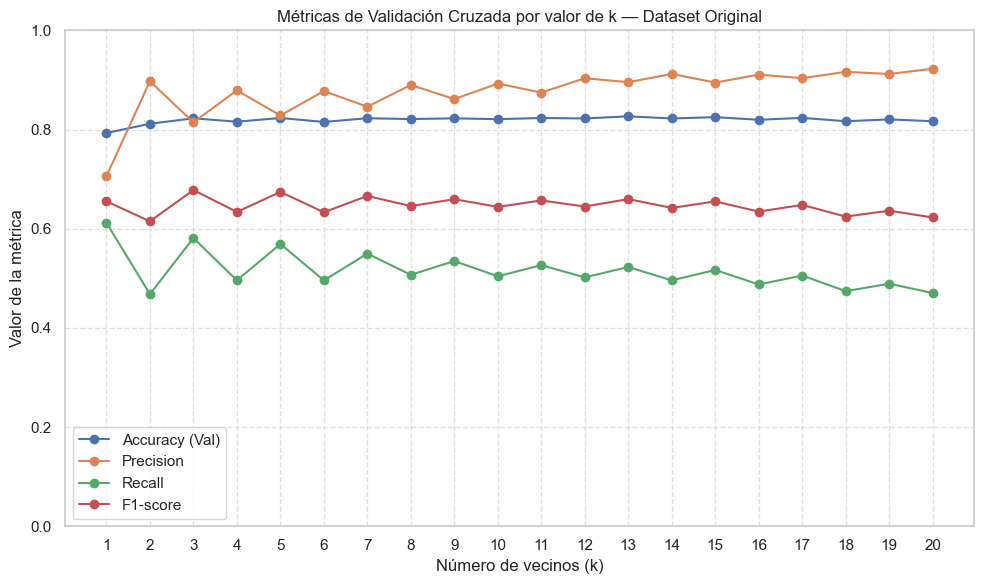

In [52]:
# Asegura orden por k
orig = df_resultados_original.sort_values('k')

plt.figure(figsize=(10, 6))
plt.plot(orig['k'], orig['Accuracy_val'],  marker='o', label='Accuracy (Val)')
plt.plot(orig['k'], orig['Precision'], marker='o', label='Precision')
plt.plot(orig['k'], orig['Recall'],    marker='o', label='Recall')
plt.plot(orig['k'], orig['F1-score'],  marker='o', label='F1-score')

plt.title('M√©tricas de Validaci√≥n Cruzada por valor de k ‚Äî Dataset Original')
plt.xlabel('N√∫mero de vecinos (k)')
plt.ylabel('Valor de la m√©trica')
plt.xticks(range(1, 21))
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Gracias a este gr√°fico nos podemos dar cuenta de como va cambiando el rendimiento del modelo a medida que cambiamos la k. Para escoger al mejor k, decidimos usar la m√©trica f1-score, ya que nos parece mejor para definir el objetivo del modelo el cual es ver los alumnos que abandonaron la universidad, ya que tanto un falso positivo como un falso negativo nos parece igual de grave para la generalizaci√≥n del modelo.

#### 2.1.2 Entrenamiento del modelo con el mejor K, matriz de confusi√≥n y m√©tricas precision, recall y f1-score

As√≠ pues, y usando el conjunto de test anteriormente establecido para evaluar mejor el modelo, entrenamos el modelo con el mejor k, y el conjunto de entrenamiento que se estableci√≥ en primer lugar.

 Mejor k seg√∫n F1-score: 3

 Matriz de confusi√≥n:
[[707  44]
 [131 224]]


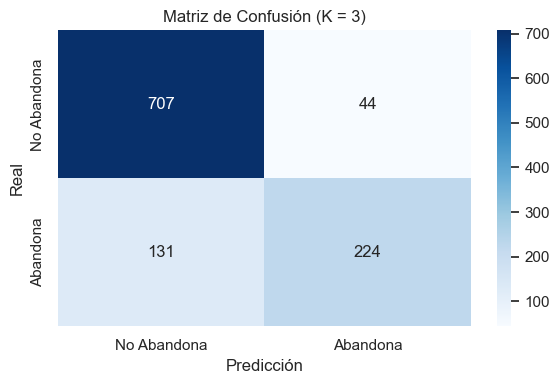


 Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

 No Abandona       0.84      0.94      0.89       751
    Abandona       0.84      0.63      0.72       355

    accuracy                           0.84      1106
   macro avg       0.84      0.79      0.80      1106
weighted avg       0.84      0.84      0.84      1106



In [53]:

# Seleccionar el mejor k seg√∫n F1-score
best_k = int(df_resultados_original.loc[df_resultados_original['F1-score'].idxmax(), 'k'])
print(f" Mejor k seg√∫n F1-score: {best_k}")

# Codificaci√≥n one-hot
X_trainval_enc = pd.get_dummies(X_trainval, columns=categorical_columns, drop_first=True)
X_test_enc = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)
X_trainval_enc, X_test_enc = X_trainval_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

# Escalado de variables num√©ricas reales
cols_to_scale = numerical_columns.intersection(X_trainval_enc.columns)
scaler = StandardScaler()
X_trainval_enc[cols_to_scale] = scaler.fit_transform(X_trainval_enc[cols_to_scale])
X_test_enc[cols_to_scale] = scaler.transform(X_test_enc[cols_to_scale])

# Convertir a arrays
X_trainval_final = X_trainval_enc.values
X_test_final = X_test_enc.values

# Entrenar el modelo final con best_k usando trainval
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_trainval_final, y_trainval)

# Predecir en test
y_pred_final = knn_final.predict(X_test_final)

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_final)
print("\n Matriz de confusi√≥n:")
print(cm)

# Visualizar matriz de confusi√≥n
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Abandona', 'Abandona'],
            yticklabels=['No Abandona', 'Abandona'])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title(f"Matriz de Confusi√≥n (K = {best_k})")
plt.tight_layout()
plt.show()

# 10. Reporte de clasificaci√≥n
print("\n Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred_final, target_names=['No Abandona', 'Abandona']))

Gracias a la matriz de confusi√≥n, nos damos cuenta de que tan solo se obtuvieron 44 falsos positivos y 131 falsos negativos.

Adem√°s, el score dado por la m√©trica `f1-score` es de `0.72`, el cual es un puntaje bastante bueno.

#### 2.1.3 Curva ROC y AUC

### 2.2 Modelo de regresi√≥n

Para el modelo de regresi√≥n, el objetivo es predecir el √≠ndice acumulado esperado al final del semestre, por lo que debemos hacer algunos ajustes en los datos con el fin de que el modelo pueda ser entrenado correctamente.

Importamos algunas librer√≠as necesarias para el modelo y su calificaci√≥n.

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

Como queremos predecir la nota acumulada del estudiante, y solo tenemos los dos primeros semestres de su vida acad√©mica, entonces debemos promediar las notas de estos semestres:

In [55]:

df["Final_Average"] = df[[
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)"
]].mean(axis=1)


Ahora viene un paso muy importante, dado que queremos predecir la nota acumulada del estudiante en los dos primeros semestres, no podemos usar los datos que se encuentran en las variables correspondientes al segundo semestre, ya que existir√≠a una fuga de datos, ya que si no se hace esto, el modelo ya tendr√≠a la informaci√≥n necesaria para calcular el promedio y el modelo ser√≠a perfecto, lo cual ser√≠a enga√±oso.

In [56]:
cols_to_exclude = [
    "Target", "Final_Average",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (without evaluations)",
]
X_full = df.drop(columns=cols_to_exclude, errors="ignore").copy()
y_full = df["Final_Average"].to_numpy()

Separamos ahora las columnas categ√≥ricas de las num√©ricas:

In [57]:
categorical_columns = [c for c in categorical_columns if c in X_full.columns]

numeric_columns_pre_ohe = [
    c for c in X_full.select_dtypes(include=['float64','int64']).columns
    if c not in categorical_columns
]

Y comenzamos a escoger el mejor K.

#### 2.2.1 B√∫squeda del mejor K

En esta secci√≥n repetimos exactamente los mismos pasos que en el modelo anterior, en lo que a divisi√≥n de datos y procesamiento de datos se refiere.

In [58]:
# Divisi√≥n de los datos apartando el conjunto de test para la evaluaci√≥n final del modelo
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_full, y_full, random_state=0
)

k_values = range(1, 21)
cv_results = {k: {"RMSE": [], "MAE": [], "R2": []} for k in k_values}

# 2) Validaci√≥n cruzada manual en trainval
for k in k_values:
    for seed in range(5):
        # Divisi√≥n interna: train y val (80/20) aleatorio
        X_tr, X_val, y_tr, y_val = train_test_split(
            X_trainval, y_trainval, random_state=seed
        )

        # One-Hot encoding
        X_tr = pd.get_dummies(X_tr, columns=categorical_columns, drop_first=True)
        X_val = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)
        X_tr, X_val = X_tr.align(X_val, join='left', axis=1, fill_value=0)

        # Escalado solo en las variables num√©ricas
        cols_to_scale = [c for c in numeric_columns_pre_ohe if c in X_tr.columns]
        scaler = StandardScaler()
        X_tr[cols_to_scale] = scaler.fit_transform(X_tr[cols_to_scale])
        X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])

        # Modelo
        knn = KNeighborsRegressor(n_neighbors=k)
        Xtr = X_tr.to_numpy(dtype=float, copy=False)
        Xva = X_val.to_numpy(dtype=float, copy=False)
        knn.fit(Xtr, y_tr)
        y_pred = knn.predict(Xva)

        # M√©tricas del fold
        mse   = mean_squared_error(y_val, y_pred)
        rmse  = np.sqrt(mse)
        mae   = mean_absolute_error(y_val, y_pred)
        r2    = r2_score(y_val, y_pred)

        cv_results[k]["RMSE"].append(rmse)
        cv_results[k]["MAE"].append(mae)
        cv_results[k]["R2"].append(r2)

# 3) Resumen por k y selecci√≥n por RMSE
summary = []
for k in k_values:
    summary.append({
        "k": k,
        "RMSE_mean": np.mean(cv_results[k]["RMSE"]),
        "RMSE_std":  np.std(cv_results[k]["RMSE"]),
        "MAE_mean":  np.mean(cv_results[k]["MAE"]),
        "R2_mean":   np.mean(cv_results[k]["R2"]),
    })

summary_df = pd.DataFrame(summary).sort_values(by="RMSE_mean", ascending=True)
print("Resumen CV 5-fold (ordenado por RMSE promedio)")
print(summary_df.to_string(index=False))

best_k = int(summary_df.iloc[0]["k"])
best_rmse = float(summary_df.iloc[0]["RMSE_mean"])
print(f"\n Mejor k por RMSE promedio: {best_k} (RMSE={best_rmse:.4f})")

Resumen CV 5-fold (ordenado por RMSE promedio)
 k  RMSE_mean  RMSE_std  MAE_mean  R2_mean
 8   1.727888  0.060486  1.066390 0.870391
10   1.728097  0.058944  1.067125 0.870467
 7   1.728986  0.060944  1.068967 0.870281
13   1.730888  0.056093  1.068793 0.870094
11   1.731144  0.056720  1.067587 0.869997
12   1.731272  0.055985  1.068855 0.869992
 9   1.731778  0.057571  1.068085 0.869913
14   1.731978  0.060444  1.073202 0.869907
15   1.734258  0.056117  1.077709 0.869583
16   1.736722  0.051798  1.078022 0.869190
17   1.740457  0.052658  1.080790 0.868624
 6   1.743966  0.068124  1.079333 0.867915
18   1.745351  0.051314  1.081949 0.867900
19   1.748179  0.054219  1.084823 0.867451
20   1.751712  0.055722  1.086759 0.866932
 5   1.756014  0.070554  1.089669 0.866034
 4   1.798718  0.076682  1.107937 0.859521
 3   1.858102  0.069552  1.132849 0.850082
 2   1.940865  0.059913  1.175126 0.836183
 1   2.196941  0.075512  1.304636 0.790072

 Mejor k por RMSE promedio: 8 (RMSE=1.7279)


In [59]:
# --- One-Hot Encoding en trainval y test
X_trainval_ohe = pd.get_dummies(X_trainval, columns=categorical_columns, drop_first=True, dtype=np.uint8)
X_test_ohe = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True, dtype=np.uint8)
X_test_ohe = X_test_ohe.reindex(columns=X_trainval_ohe.columns, fill_value=0)

# --- Escalado de num√©ricas (ajustado SOLO en trainval)
cols_to_scale_final = [c for c in numeric_columns_pre_ohe if c in X_trainval_ohe.columns]
scaler_final = StandardScaler()
X_trainval_ohe[cols_to_scale_final] = scaler_final.fit_transform(X_trainval_ohe[cols_to_scale_final])
X_test_ohe[cols_to_scale_final] = scaler_final.transform(X_test_ohe[cols_to_scale_final])

# --- Entrenar modelo final y predecir en test
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_trainval_ohe, y_trainval)
y_pred_test = knn_final.predict(X_test_ohe)

# --- M√©tricas en TEST 
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n===== M√©tricas en TEST (20%) =====")
print(f"RMSE:    {rmse_test:.4f}")
print(f"MAE:     {mae_test:.4f}")
print(f"R¬≤:      {r2_test:.4f}")



===== M√©tricas en TEST (20%) =====
RMSE:    1.7160
MAE:     1.0452
R¬≤:      0.8722


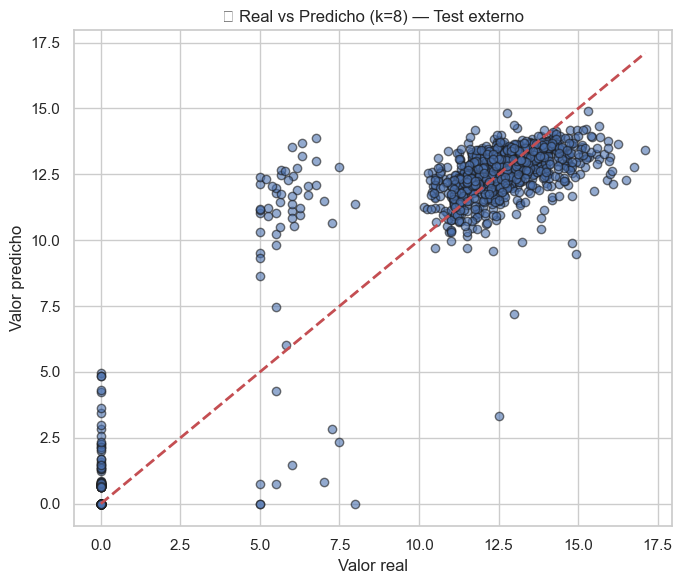

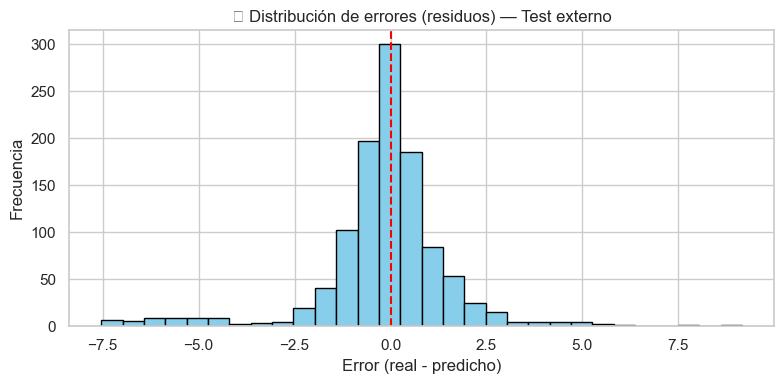

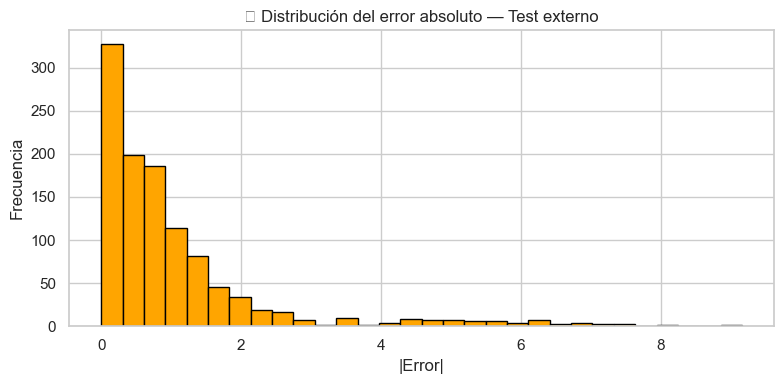

In [60]:

# 1) Gr√°fico Real vs Predicho (holdout)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title(f"üìà Real vs Predicho (k={best_k}) ‚Äî Test externo")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Distribuci√≥n de errores (residuos) en holdout
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.axvline(0, linestyle='--', color='red', lw=1.5)
plt.title("üìâ Distribuci√≥n de errores (residuos) ‚Äî Test externo")
plt.xlabel("Error (real - predicho)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3) Distribuci√≥n del error absoluto en holdout
abs_errors = np.abs(residuals)
plt.figure(figsize=(8, 4))
plt.hist(abs_errors, bins=30, edgecolor='black', color='orange')
plt.title("üìä Distribuci√≥n del error absoluto ‚Äî Test externo")
plt.xlabel("|Error|")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()
